In [2]:
import pickle
import os
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from ecgdetectors import Detectors
from scipy import signal
from scipy.stats import skew,kurtosis,iqr

In [3]:
filelists = ['../../affect-recognition/data/8/'+a for a in os.listdir('../../affect-recognition/data/8/') if a[-1] not in ['s','f']]

In [4]:
filelists[0]

'../../affect-recognition/data/8/S11.pkl'

In [61]:
X_acc = []
X_ppg = []
X_qual = []
y_rr = []
y_inspiration = []
y_expiration = []
y_respiration = []
groups = []
for i in range(len(filelists)):
    data = pickle.load(open(filelists[i],'rb'))
    data['acc_window'] = data['acc_window'].apply(lambda a:a[:,1:] if a.shape[0]==256 else np.concatenate([a[:,1:],np.mean(a[:,1:],axis=0).reshape(-1,3)],axis=0))
    data['data'] = data['data'].apply(lambda a:a.values[:,1:])
    data['shape'] = data['data'].apply(lambda a:a.shape)
    acc_windows = np.array(list(data['acc_window']))
    ppg_windows = np.array(list(data['data']))
    ppg_data = ppg_windows[:,:,:1].reshape(-1,512)
    ppg_qual_data = ppg_windows[:,:,1:]
    ecg_rr = np.array(list(data['ecg_rr'])).reshape(-1,1)
    inspiration = np.array(list(data['inspiration_duration'])).reshape(-1,1)
    expiration = np.array(list(data['expiration_duration'])).reshape(-1,1)
    respiration = np.array(list(data['respiration_duration'])).reshape(-1,1)
    X_ppg.append(ppg_data)
    X_acc.append(acc_windows)
    X_qual.append(ppg_qual_data)
    y_rr.append(ecg_rr)
    y_inspiration.append(inspiration)
    y_expiration.append(expiration)
    y_respiration.append(respiration)
    groups += [i]*ecg_rr.shape[0]
    print(acc_windows.shape,ppg_data.shape,ppg_qual_data.shape,ecg_rr.shape,len(groups))

(653, 256, 3) (653, 512) (653, 512, 4) (653, 1) 653
(802, 256, 3) (802, 512) (802, 512, 4) (802, 1) 1455
(655, 256, 3) (655, 512) (655, 512, 4) (655, 1) 2110
(811, 256, 3) (811, 512) (811, 512, 4) (811, 1) 2921
(654, 256, 3) (654, 512) (654, 512, 4) (654, 1) 3575
(883, 256, 3) (883, 512) (883, 512, 4) (883, 1) 4458
(739, 256, 3) (739, 512) (739, 512, 4) (739, 1) 5197
(691, 256, 3) (691, 512) (691, 512, 4) (691, 1) 5888
(685, 256, 3) (685, 512) (685, 512, 4) (685, 1) 6573
(781, 256, 3) (781, 512) (781, 512, 4) (781, 1) 7354
(702, 256, 3) (702, 512) (702, 512, 4) (702, 1) 8056
(652, 256, 3) (652, 512) (652, 512, 4) (652, 1) 8708
(682, 256, 3) (682, 512) (682, 512, 4) (682, 1) 9390
(759, 256, 3) (759, 512) (759, 512, 4) (759, 1) 10149
(692, 256, 3) (692, 512) (692, 512, 4) (692, 1) 10841


In [62]:
X_ppg,X_qual,X_acc,y_rr, y_respiration,y_inspiration,y_expiration = np.concatenate(X_ppg),np.concatenate(X_qual), \
                                        np.concatenate(X_acc),np.concatenate(y_rr), \
                                        np.concatenate(y_respiration),np.concatenate(y_inspiration), \
                                        np.concatenate(y_expiration)
groups = np.array(groups)

In [63]:
pickle.dump([X_ppg,X_qual,X_acc,y_rr, y_respiration,y_inspiration,y_expiration,groups],open('../../affect-recognition/data/tabular_data.p','wb'))

(array([ 437., 2268., 3686., 2414., 1079.,  398.,  264.,  209.,   67.,
          17.]), array([ 43.78801137,  54.94462703,  66.10124269,  77.25785835,
         88.41447401,  99.57108967, 110.72770533, 121.88432099,
        133.04093665, 144.19755231, 155.35416797]), <a list of 10 Patch objects>)

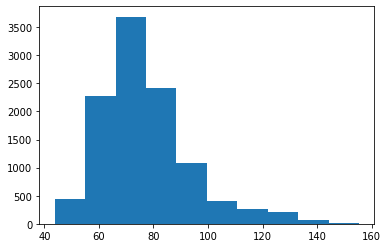

In [60]:
plt.hist(60000/(1000*y_rr))

In [56]:
y_rr

array([[0.63978023],
       [0.64678572],
       [0.66607141],
       ...,
       [0.68619049],
       [0.75185714],
       [0.64362638]])